In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, add, Dropout, Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.9.1


In [4]:
df_labels = pd.read_csv('./dane/labels.csv')

In [5]:
df_labels

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


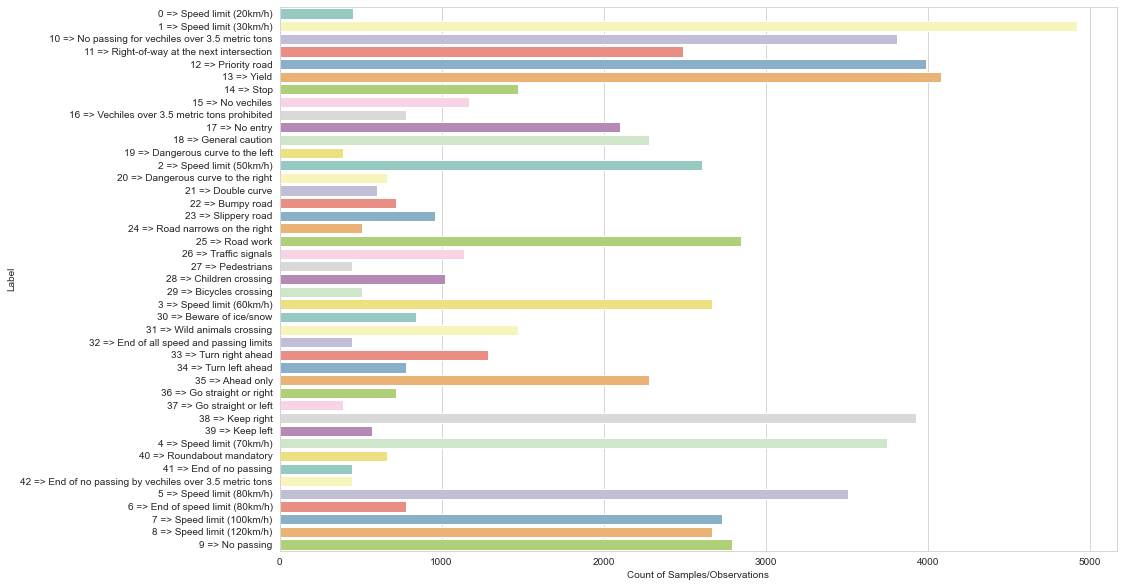

In [6]:
d = dict()
class_labels = dict()
for dirs in os.listdir('./dane/myData'):
    count = len(os.listdir('./dane/myData/' + dirs))
    d[dirs+' => '+df_labels[df_labels.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = df_labels[df_labels.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (15, 10))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

In [7]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('./dane/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


In [8]:
X , y = data.next()

In [9]:
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(73139, 32, 32, 3)
Labels shape :(73139, 43)


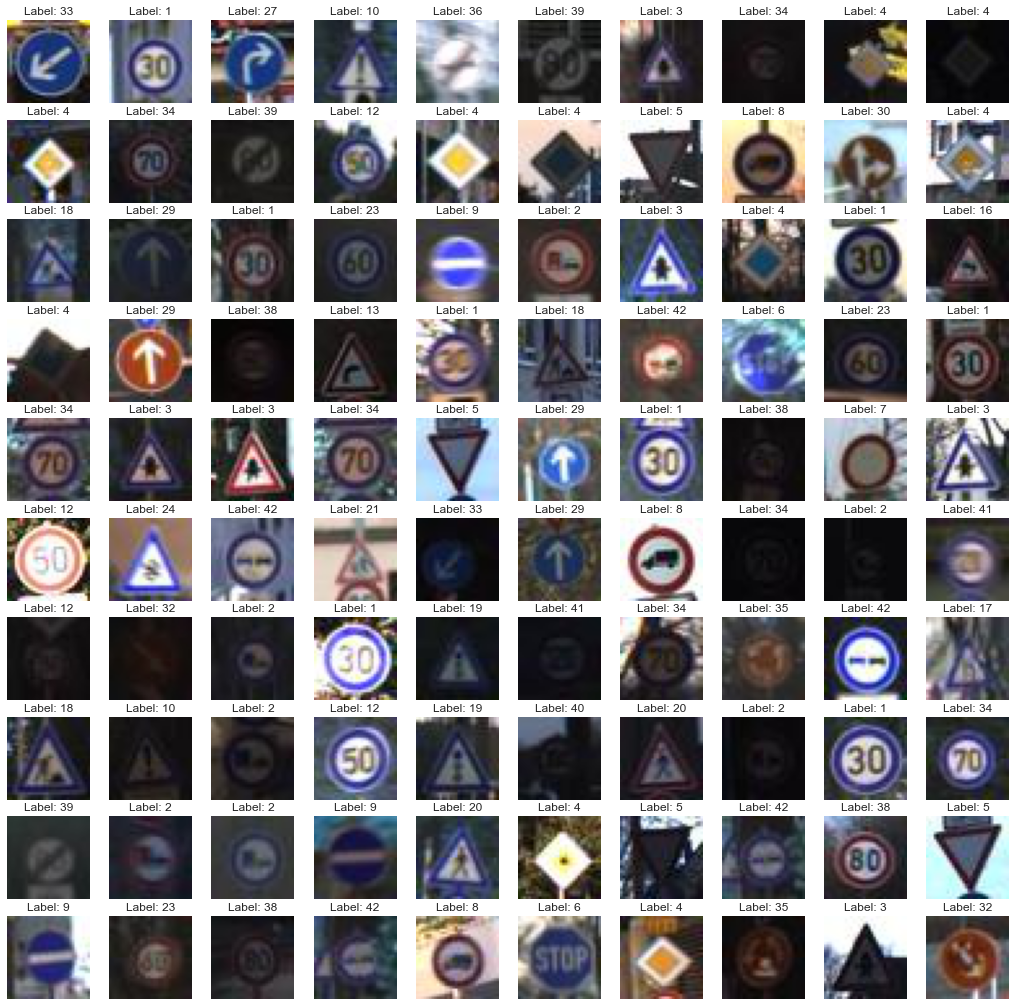

In [10]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [12]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (58511, 32, 32, 3)
Test Shape : (14628, 32, 32, 3)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [14]:
def draw_curves(history, key1='accuracy', ylim1=(0.7, 1.00), 
                key2='loss', ylim2=(0.0, 0.6)):
    plt.figure(figsize=(12,4))
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')
 
    plt.show()

Epoch 1/10
229/229 [==============================] - 102s 443ms/step - loss: 1.8923 - accuracy: 0.5408 - val_loss: 0.5118 - val_accuracy: 0.8706
Epoch 2/10
229/229 [==============================] - 101s 443ms/step - loss: 0.5275 - accuracy: 0.8541 - val_loss: 0.2323 - val_accuracy: 0.9417
Epoch 3/10
229/229 [==============================] - 107s 469ms/step - loss: 0.2765 - accuracy: 0.9217 - val_loss: 0.1401 - val_accuracy: 0.9599
Epoch 4/10
229/229 [==============================] - 110s 479ms/step - loss: 0.1842 - accuracy: 0.9472 - val_loss: 0.1030 - val_accuracy: 0.9736
Epoch 5/10
229/229 [==============================] - 111s 486ms/step - loss: 0.1297 - accuracy: 0.9622 - val_loss: 0.0864 - val_accuracy: 0.9761
Epoch 6/10
229/229 [==============================] - 110s 479ms/step - loss: 0.1033 - accuracy: 0.9704 - val_loss: 0.0799 - val_accuracy: 0.9765
Epoch 7/10
229/229 [==============================] - 108s 471ms/step - loss: 0.0925 - accuracy: 0.9733 - val_loss: 0.0518 -

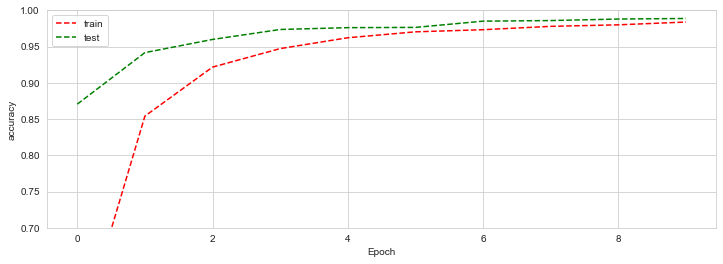

CNN Error: 1.12%


In [15]:
model = Sequential()

model.add(Convolution2D(filters = 128, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(256, (3, 3), activation='relu'))

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(43, activation = 'softmax'))
 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


 
EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=5,
                          verbose=1)
 
history = model.fit(X_train, y_train,
                    batch_size = 256,
                    epochs=10, 
                    verbose=1,
                    validation_data = (X_test, y_test),
                    callbacks = [EarlyStop]
                   )
 
model.summary()
draw_curves(history, key1='accuracy', key2='loss')

score = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

In [92]:
predictions = model.predict(X_test,verbose=0)

In [93]:
from keras.models import Model
filters, biases = model.layers[0].get_weights()
print(filters)

[[[[-0.08516562  0.07790062 -0.04433215 ... -0.02653561 -0.07447654
     0.05439882]
   [ 0.00219557  0.05265991  0.0278637  ... -0.00765381  0.01782233
     0.00494038]
   [ 0.01880182 -0.01649809  0.00222467 ... -0.04961629 -0.07574087
    -0.07296681]]

  [[-0.03456604 -0.05464385  0.05496071 ... -0.06227294  0.02768799
    -0.02902202]
   [-0.02206253 -0.09919228  0.00541834 ... -0.010499    0.00823062
     0.04712458]
   [-0.00130266  0.01702363 -0.06621847 ... -0.07233884  0.01399384
     0.01595949]]

  [[ 0.0510811   0.01740063 -0.0142717  ... -0.00235643 -0.0569701
    -0.08372989]
   [ 0.01110404 -0.02994279  0.04498117 ... -0.04834337 -0.05866593
     0.02342352]
   [ 0.02322853 -0.08639651  0.04823561 ... -0.04976064  0.03581319
    -0.00992187]]]


 [[[ 0.01585846  0.05884049 -0.09898128 ...  0.01318166 -0.08370039
    -0.01443384]
   [-0.05886741 -0.07698579 -0.00999955 ... -0.05057142 -0.0338137
    -0.08491024]
   [-0.08461022 -0.02038627 -0.07357276 ... -0.06826488 -0.

1/1 [==============================] - 0s 61ms/step


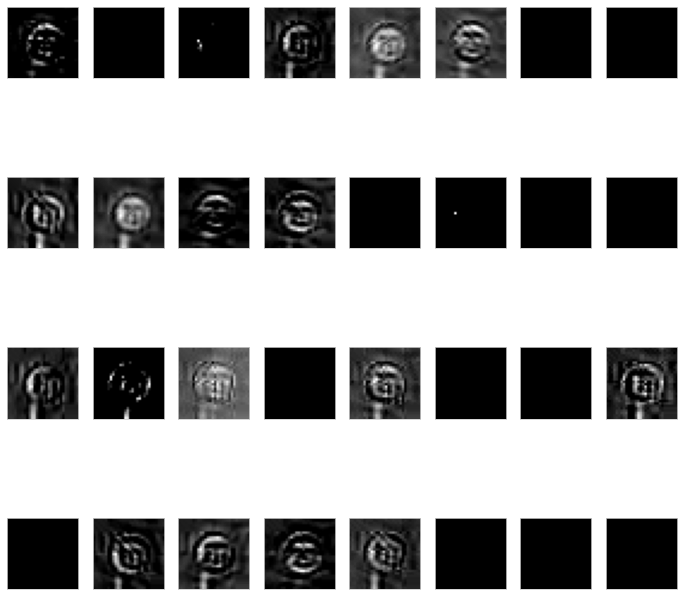

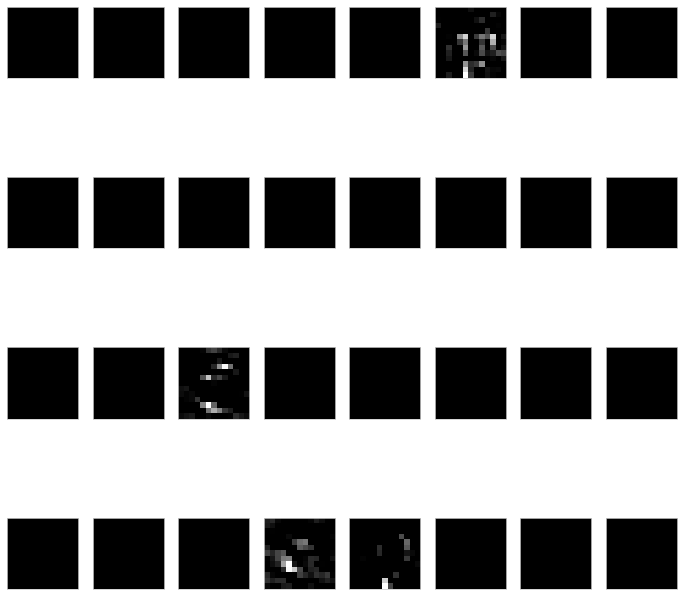

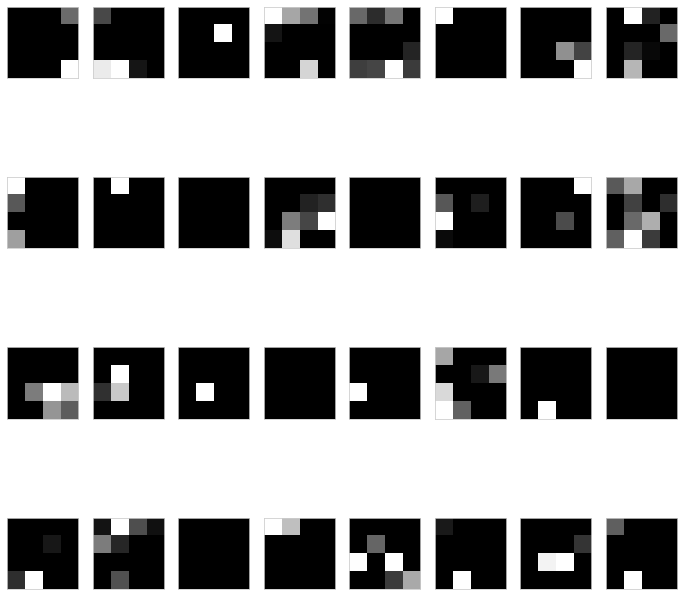

In [94]:
columns = 8
rows = 4
#from keras.preprocessing.image import img_to_array
numerLayers = [0,2,4]
outputs = [model.layers[i].output for i in numerLayers]
models = Model(inputs=model.inputs, outputs=outputs)

img = tf.keras.utils.img_to_array(X_test[0])
img = np.expand_dims(img, axis=0)
feature_output = models.predict(img)
for ftr in feature_output:
    fig=plt.figure(figsize=(12,12))
    for i in range(1, columns*rows+1):
        fig = plt.subplot(rows,columns,i)
        fig.set_xticks([])
    
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :,i-1], cmap='gray')
    plt.show()

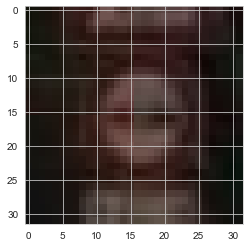

In [110]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1].astype('uint8'))

In [244]:
def plot_image(i, predictions, trueLabel, img):
  indexClass = np.where(trueLabel[i] == a)
  trueLabel, img = indexClass[0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.astype('uint8'))

  predictedLabel = np.argmax(predictions)
  if predictedLabel == trueLabel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(predictedLabel,
                                100*np.max(predictions)),
                                color=color)
def plot_value_array(i, predictions, trueLabel):
  indexClass = np.where(trueLabel[i] == a)
  true_label = int(indexClass[0])
  plt.grid(False)
  plt.xticks(range(43))
  plt.yticks([])
  thisplot = plt.bar(np.arange(43), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

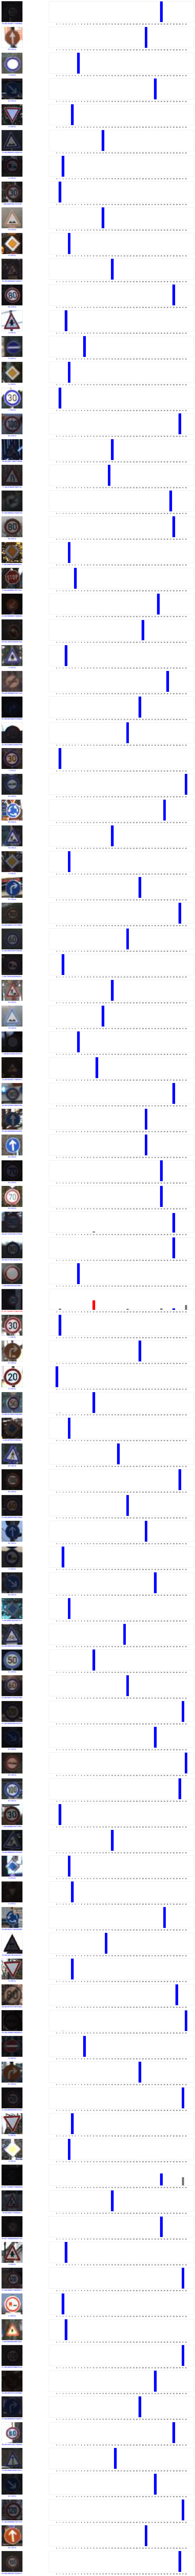

In [247]:
numRows = 100
numCols = 1
numImages = numRows*numCols
plt.figure(figsize=(2*10*numCols, 2*numRows))
for i in range(numImages):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plot_image(i, predictions[i], y_test, xTest_cnn)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()